#### **Ejercicio:** Ejercicio sobre KMeans

**Elaborado por:** Fabian Villarreal Sosa

**Tarea**

Tu tarea es realizar la segmentación de clientes utilizando KMeans. Nos interesa agrupar a nuestros clientes en grupos basados en características similares. Esto puede ayudar a la empresa a asignar recursos de marketing de forma eficaz. Usaremos la edad del cliente, los años de educación en el empleo, los ingresos, la deuda, si incumplieron y la relación deuda: ingresa el índice para separarlos por segmentos. Puedes descargar los datos aquí. Los datos originales provienen de esta fuente.

https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means

**Parte 1**

Utiliza KMeans para crear varios segmentos de clientes.

**Parte 2**

Explora tus diversos segmentos de clientes. ¿Cuáles son las tendencias en los segmentos? Crea al menos dos visualizaciones que exploren las tendencias en los grupos.

In [139]:
# Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from google.colab import drive

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [140]:
# Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
# Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Datos')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Datos'

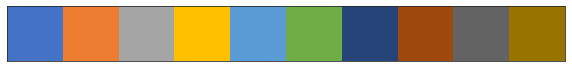

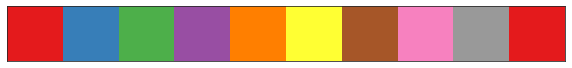

In [142]:
# Estilo de graficos
sns.set_style('white')
csfont = {'fontname':'Calibri'} # Fuente a utilizar

# Paleta de colores
my_palette = ['#4472C4', '#ED7D31', '#A5A5A5', '#FFC000', '#5B9BD5', '#70AD47', '#264478', '#9E480E', '#636363', '#997300'] # Excel color palette
my_palette2 = sns.color_palette('Set1', 10)
sns.palplot(sns.color_palette(my_palette, 10))
sns.palplot(sns.color_palette('Set1', 10))

# Define palette
sns.set_palette(my_palette2)

In [143]:
# Datos
df = pd.read_csv('cust_seg.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [144]:
# Columnas con valores perdidos
cols_nans = df.columns[df.isna().any()]
cols_nans

Index(['Defaulted'], dtype='object')

In [145]:
# Ver estadistica descriptiva de variables de acuerdo a 'Defaulted'
df.groupby(['Defaulted']).agg({'Income': ['mean', 'min', 'max'],
                               'Card Debt': ['mean', 'min', 'max'],
                               'Other Debt': ['mean', 'min', 'max'],
                               'DebtIncomeRatio': ['mean', 'min', 'max']})

Income          Card Debt  ... Other Debt DebtIncomeRatio           
                mean min  max      mean  ...        max            mean  min   max
Defaulted                                ...                                      
0.0        47.154739  14  253  1.245513  ...     18.269        8.679304  0.4  32.5
1.0        41.213115  14  446  2.423858  ...     27.034       14.727869  0.9  41.3

[2 rows x 12 columns]

In [146]:
# Proporcion de clientes por 'Defaulted'
round(df['Defaulted'].value_counts()/df.shape[0] * 100, 2)

# La mayoria no ha caido en default

0.0    60.82
1.0    21.53
Name: Defaulted, dtype: float64

In [147]:
# Eliminar observaciones que poseen datos perdidos en la variable 'Defaulted'
df = df[df['Defaulted'].notna()]

In [148]:
# Variables de interes
X_var = df.drop(['Customer Id'], axis = 1).columns
X = df.loc[:, X_var]

In [149]:
# Escalar los datos
scaler = StandardScaler()
# Ajustar con base en el conjunto de datos
X = scaler.fit_transform(X)

**Estimación y resultados**

In [150]:
# Estimacion de clusters por KMeans
np.random.seed(2731)
kmeans = KMeans(n_clusters = 3, random_state = 2731)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=2731)

In [151]:
# Segmentacion de los clientes
df['cluster'] = kmeans.labels_ + 1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [152]:
# Distribucion de los clusters en la base de clientes
print(df['cluster'].value_counts())
print('\n')
print(round(df['cluster'].value_counts()/df.shape[0] * 100), 2)

# Alrededor del 59% de clientes se encuentran en el cluster 2, el 23% en el 1 y 18% en el 3

2    414
1    161
3    125
Name: cluster, dtype: int64


2    59.0
1    23.0
3    18.0
Name: cluster, dtype: float64 2


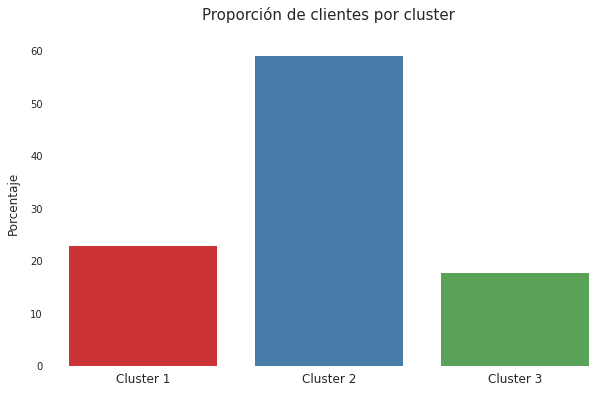

In [153]:
# https://www.python-graph-gallery.com/basic-barplot-with-seaborn
# https://www.codegrepper.com/code-examples/python/seaborn+barplot+with+percentage

cluster_df = pd.DataFrame(round(df['cluster'].value_counts()/df.shape[0] * 100, 2), index = None)
cluster_df.reset_index(inplace = True)
cluster_df = cluster_df.rename(columns = {'index': 'cluster',
                                          'cluster': 'percent'})

sns.barplot(data = cluster_df,
            x = 'cluster',
            y = 'percent',
            estimator = sum,
            ci = None)

plt.title('Proporción de clientes por cluster', fontsize = 15, pad = 20)
plt.ylabel('Porcentaje', fontsize = 12, labelpad = 10)
plt.xlabel('', fontsize = 12, labelpad = 10)
plt.xticks([0, 1, 2], ['Cluster 1', 'Cluster 2', 'Cluster 3'], rotation = 0, fontsize = 12)
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(10 ,6);

# La mayoria de clientes se encuentran en el cluster 2 (59%)

**Tendencias en los segmentos**

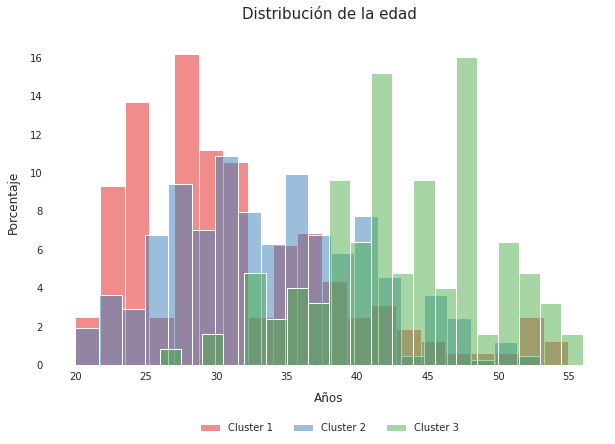

In [154]:
# Distribución de la edad por clusters
p1=sns.histplot(data = df[df['cluster'] == 1], x = 'Age', stat = 'percent', bins = 20, color = my_palette2[0], alpha = 0.5, label = 'Cluster 1')
p2=sns.histplot(data = df[df['cluster'] == 2], x = 'Age', stat = 'percent', bins = 20, color = my_palette2[1], alpha = 0.5, label = 'Cluster 2')
p3=sns.histplot(data = df[df['cluster'] == 3], x = 'Age', stat = 'percent', bins = 20, color = my_palette2[2], alpha = 0.5, label = 'Cluster 3')

plt.title('Distribución de la edad', fontsize = 15, pad = 20)
plt.legend(title = None,
           loc = 'upper center',
           bbox_to_anchor = (0.5, -0.15),
           ncol = 3,
           frameon = False)
plt.ylabel('Porcentaje', fontsize = 12, labelpad = 10)
plt.xlabel('Años', fontsize = 12, labelpad = 10)
p1.set_xticklabels('{:,.0f}'.format(x) for x in p1.get_xticks())
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(10 ,6);

# El cluster 3 tiende a tener una mayor edad en promedio en relacion a los otros dos clusters.

In [155]:
df.groupby(['cluster']).agg({'Age': ['mean', 'median']})

Age       
              mean median
cluster                  
1        31.366460   29.0
2        33.727053   33.0
3        43.112000   43.0

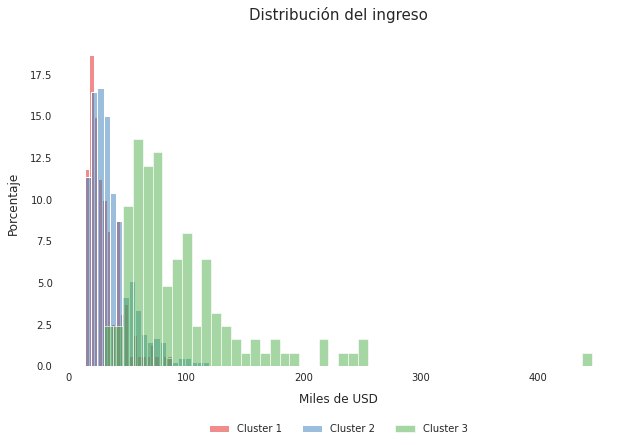

In [156]:
# Distribución del ingreso por clusters
p1=sns.histplot(data = df[df['cluster'] == 1], x = 'Income', stat = 'percent', bins = 20, color = my_palette2[0], alpha = 0.5, label = 'Cluster 1')
p2=sns.histplot(data = df[df['cluster'] == 2], x = 'Income', stat = 'percent', bins = 20, color = my_palette2[1], alpha = 0.5, label = 'Cluster 2')
p3=sns.histplot(data = df[df['cluster'] == 3], x = 'Income', stat = 'percent', bins = 50, color = my_palette2[2], alpha = 0.5, label = 'Cluster 3')

plt.title('Distribución del ingreso', fontsize = 15, pad = 20)
plt.legend(title = None,
           loc = 'upper center',
           bbox_to_anchor = (0.5, -0.15),
           ncol = 3,
           frameon = False)
plt.ylabel('Porcentaje', fontsize = 12, labelpad = 10)
plt.xlabel('Miles de USD', fontsize = 12, labelpad = 10)
p1.set_xticklabels('{:,.0f}'.format(x) for x in p1.get_xticks())
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(10 ,6);

# El cluster 3 se caracteriza por estar conformado por individuos con mayores ingresos en promedio
# Al considerar los clusters 2 y 1, no se pueden observar diferencias marcadas

In [157]:
df.groupby(['cluster']).agg({'Income': ['mean', 'median', 'max']})

Income            
              mean median  max
cluster                       
1        30.484472   27.0   88
2        36.246377   32.0  120
3        96.056000   78.0  446

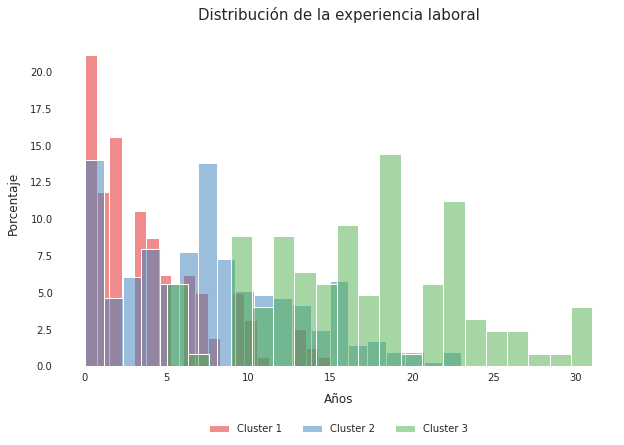

In [158]:
# Distribución de la experiencia laboral
p1=sns.histplot(data = df[df['cluster'] == 1], x = 'Years Employed', stat = 'percent', bins = 20, color = my_palette2[0], alpha = 0.5, label = 'Cluster 1')
p2=sns.histplot(data = df[df['cluster'] == 2], x = 'Years Employed', stat = 'percent', bins = 20, color = my_palette2[1], alpha = 0.5, label = 'Cluster 2')
p3=sns.histplot(data = df[df['cluster'] == 3], x = 'Years Employed', stat = 'percent', bins = 20, color = my_palette2[2], alpha = 0.5, label = 'Cluster 3')

plt.title('Distribución de la experiencia laboral', fontsize = 15, pad = 20)
plt.legend(title = None,
           loc = 'upper center',
           bbox_to_anchor = (0.5, -0.15),
           ncol = 3,
           frameon = False)
plt.ylabel('Porcentaje', fontsize = 12, labelpad = 10)
plt.xlabel('Años', fontsize = 12, labelpad = 10)
p1.set_xticklabels('{:,.0f}'.format(x) for x in p1.get_xticks())
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(10 ,6);

# El cluster 3 se conforma por personas que poseen en promedio mayor experiencia laboral

In [159]:
df.groupby(['cluster']).agg({'Years Employed': ['mean', 'median']})

Years Employed       
                  mean median
cluster                      
1             3.689441    3.0
2             7.644928    7.0
3            16.904000   17.0

In [160]:
# Proporción de default por cluster

cross_default = pd.crosstab(index = df['cluster'], columns = df['Defaulted'], normalize = 'index') * 100 # En porcentaje
cross_default = cross_default.rename(columns = {0: 'No en Default',
                                                1: 'En Default'})

print('Proporción de default por cluster\n')
round(cross_default, 2)

Proporción de default por cluster



Defaulted,No en Default,En Default
cluster,,
1,2.48,97.52
2,100.00,0.00
3,79.20,20.80


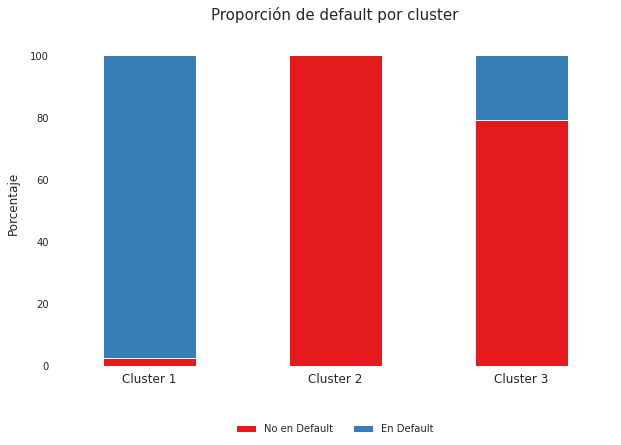

In [161]:
cross_default.plot(kind = 'bar',
                   stacked = True,
                   color = my_palette2,
                   figsize = (10, 6))

plt.title('Proporción de default por cluster', fontsize = 15, pad = 20)
plt.legend(title = None,
           loc = 'upper center',
           bbox_to_anchor = (0.5, -0.15),
           ncol = 4,
           frameon = False)
plt.ylabel('Porcentaje', fontsize = 12, labelpad = 10)
plt.xlabel('', fontsize = 12, labelpad = 10)
plt.xticks([0, 1, 2], ['Cluster 1', 'Cluster 2', 'Cluster 3'], rotation = 0, fontsize = 12)
sns.despine(left = True, bottom = True);

# Esta es una de las variables en donde mayor diferencia existe al desagregar su composicion por clusters.
# El cluster 2 no posee individuos que hayan caido en default.
# El cluster 1 con tiene alrededor de 97.52% de personas en default; mientras que, el cluster 3 posee alrededor de 20.8%.

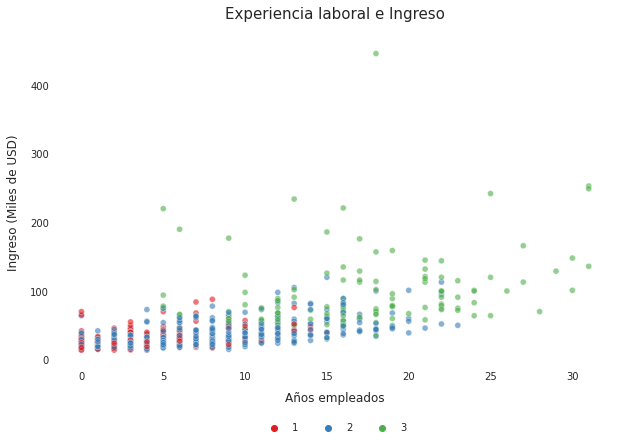

In [162]:
sns.scatterplot(data = df,
                x = 'Years Employed',
                y = 'Income',
                hue = 'cluster',
                palette = my_palette2[0:3],
                alpha = 0.6)

plt.title('Experiencia laboral e Ingreso', fontsize = 15, pad = 20)
plt.legend(title = None,
           loc = 'upper center',
           bbox_to_anchor = (0.5, -0.15),
           ncol = 3,
           frameon = False)
plt.ylabel('Ingreso (Miles de USD)', fontsize = 12, labelpad = 10)
plt.xlabel('Años empleados', fontsize = 12, labelpad = 10)
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(10 ,6);